## Problem Statement

### Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data Dataset This is the Dataset You can use this dataset for this question.

In [1]:
#import neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#load data
df = pd.read_csv('../dataset/rideshare_kaggle.csv')

In [3]:
#checking no of rows and columns
df.shape

(693071, 57)

- Dataset have 57 features and 393071 entries.

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

- Data types are correct
- Price missing values

In [7]:
#checking missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
df.duplicated().sum()

0

- No duplicate rows

In [9]:
#Creating new column 'year','time' and dropping datetime
year = df['datetime'].apply(lambda x: x.split('-')[0])

In [10]:
df.head(1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0,0.0,0.68,8.66,9.17,1545015600,10.0,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.7,1021.98,57,0.72,0,10.0,303.8,1544962084,1544994864,0.3,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000


In [11]:
df.insert(5, 'year',year)

In [12]:
time = df['datetime'].apply(lambda x:x.split(' ')[1])

In [13]:
df.insert(6, 'time',time)

In [14]:
#dropping first two and datetime column
df.drop(columns = ['id','timestamp','datetime'],axis=1,inplace=True)

In [15]:
#changing datatype of year
df['year'] = df['year'].astype(int)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
year,693071.0,2.018000e+03,0.000000,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


In [17]:
#checking correlation.
df.corr()

,hour,day,month,year,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
hour,1.000000,0.066090,-0.079379,NaN,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,0.066090,1.000000,-0.861306,NaN,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,-0.079379,-0.861306,1.000000,NaN,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.000561,-0.000722,0.000913,NaN,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.002280,-0.000627,0.002298,NaN,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,-0.000077,0.001389,-0.000628,NaN,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.019493,0.006838,0.085791,NaN,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0.173299,-0.002355,0.172571,-0.130234,0.149110,-0.032318,-0.064464,0.010698,0.124166,0.063231,0.171717,0.171696,-0.199310,-0.047535,0.171820,-0.114185,0.169592,-0.108953,0.175177,-0.096084,0.170921,-0.082600,0.173206
longitude,-0.006295,0.078690,-0.126912,NaN,-0.001417,-0.000293,-0.001829,-0.531259,1

<AxesSubplot:>

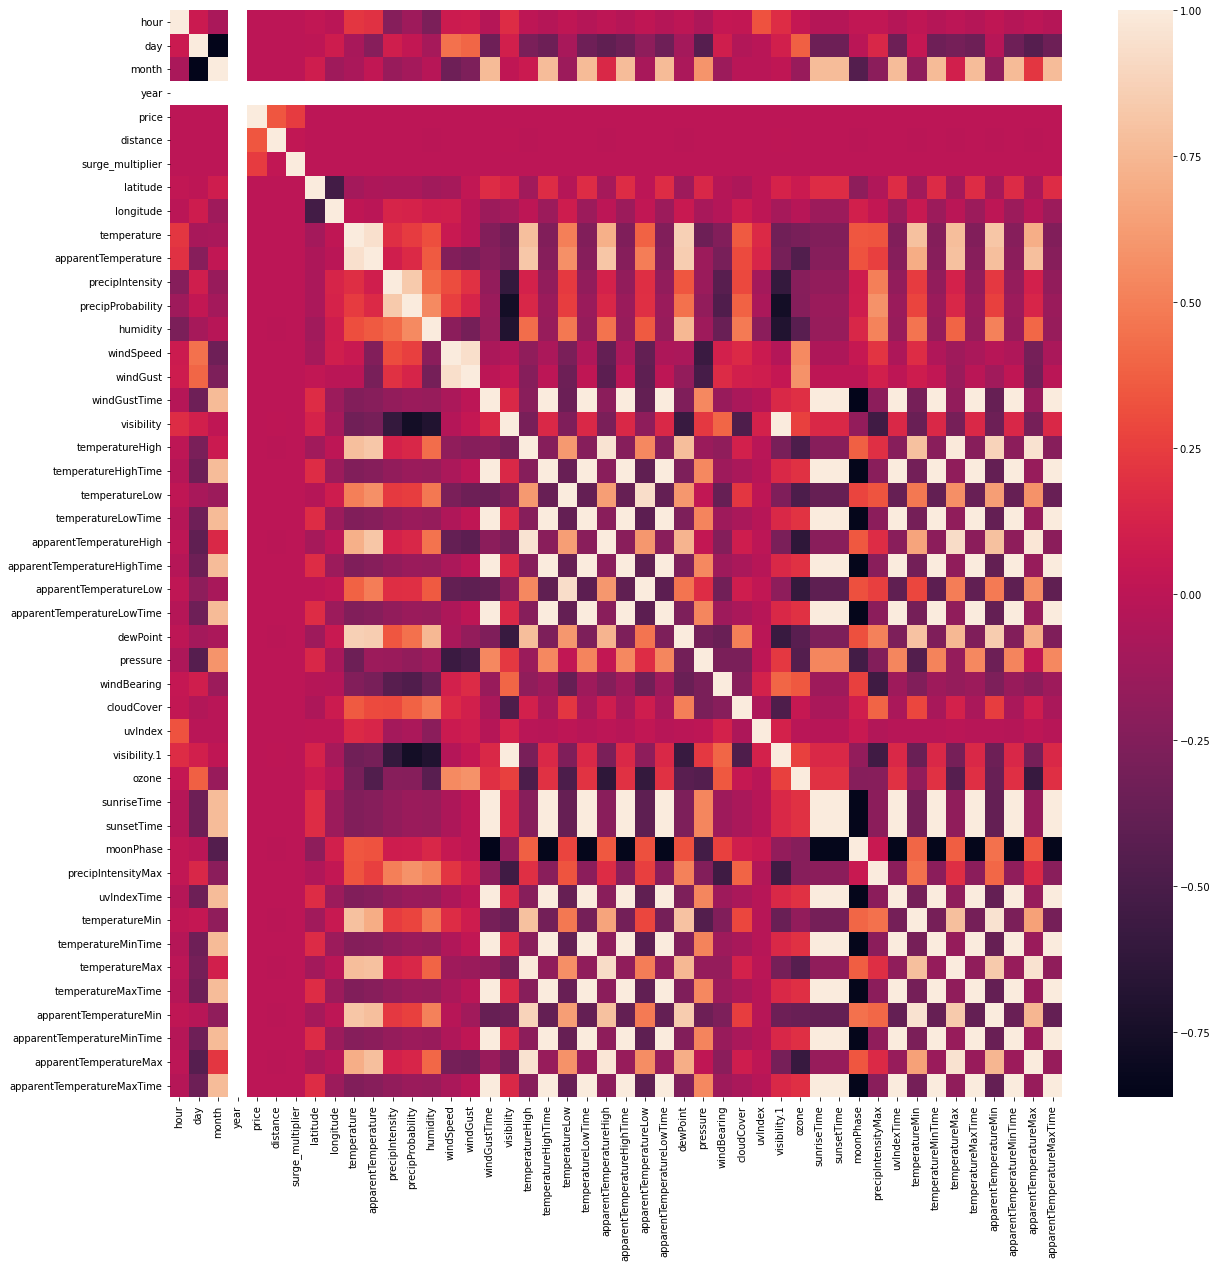

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

- Data is collinear

In [19]:
#checking temp related features correlation with price
temp_feature = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

In [20]:
temp_feature.head(2)

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92


In [21]:
temp_feature.corr()[['price']]

,price
price,1.000000
temperature,-0.000084
apparentTemperature,-0.000193
temperatureHigh,-0.000516
temperatureLow,0.000182
apparentTemperatureHigh,-0.000261
apparentTemperatureLow,0.000831
temperatureMin,-0.000428
temperatureHighTime,0.000759
temperatureMax,-0.000550


<AxesSubplot:>

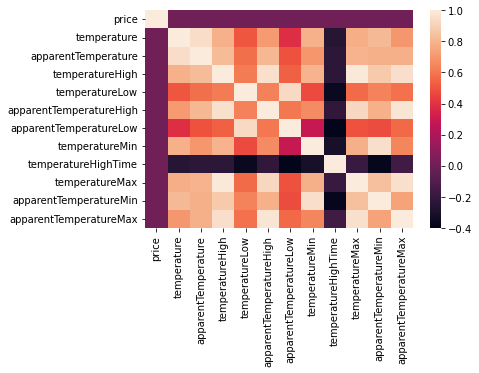

In [22]:
sns.heatmap(temp_feature.corr())

- temp features have less correlation with price column since dropping them.

In [23]:
df.drop(temp_feature.columns[1:],axis=1,inplace=True)

In [24]:
df.head(2)

,hour,day,month,year,time,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,9,16,12,2018,09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,1545048000,1544968800,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,1545012000,1544968800,1545012000,1544958000
1,2,27,11,2018,02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,1543298400,1543251600,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,1543233600,1543251600,1543291200,1543251600


In [25]:
df.shape

(693071, 45)

In [26]:
df['year'].unique()

array([2018])

In [27]:
#dropping year column
df.drop(['year'],axis=1,inplace=True)

In [28]:
#checking climate related features correlation with price feature
climate_feature = df[['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed','windGust', 'visibility', 
           'dewPoint', 'pressure', 'windBearing','cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase','precipIntensityMax']]

In [29]:
climate_feature.corr()[['price']]

,price
price,1.000000
precipIntensity,0.000166
precipProbability,-0.000243
humidity,-0.001238
windSpeed,0.000990
windGust,0.001218
visibility,0.001497
dewPoint,-0.000615
pressure,0.000866
windBearing,-0.001382


<AxesSubplot:>

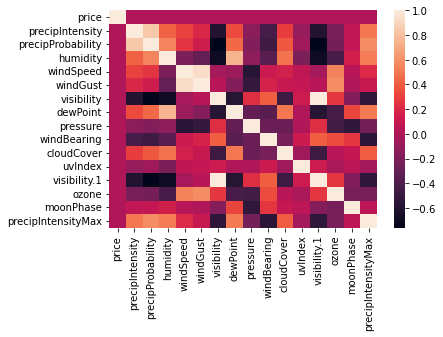

In [30]:
sns.heatmap(climate_feature.corr())

- climate related features have very less correlation with price since dropping it.

In [31]:
df.drop(climate_feature.columns[1:],axis=1,inplace=True)

In [32]:
df.head(1)

,hour,day,month,time,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,windGustTime,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,icon,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,9,16,12,09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,Rain throughout the day.,1545015600,1545048000,1544968800,1545044400,partly-cloudy-night,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000


In [33]:
df.shape

(693071, 29)

In [34]:
#extracting numerical and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [35]:
num_df = df[num_col]
cat_df = df[cat_col]

In [36]:
num_df.shape

(693071, 19)

In [37]:
#checking distribution of numerical features

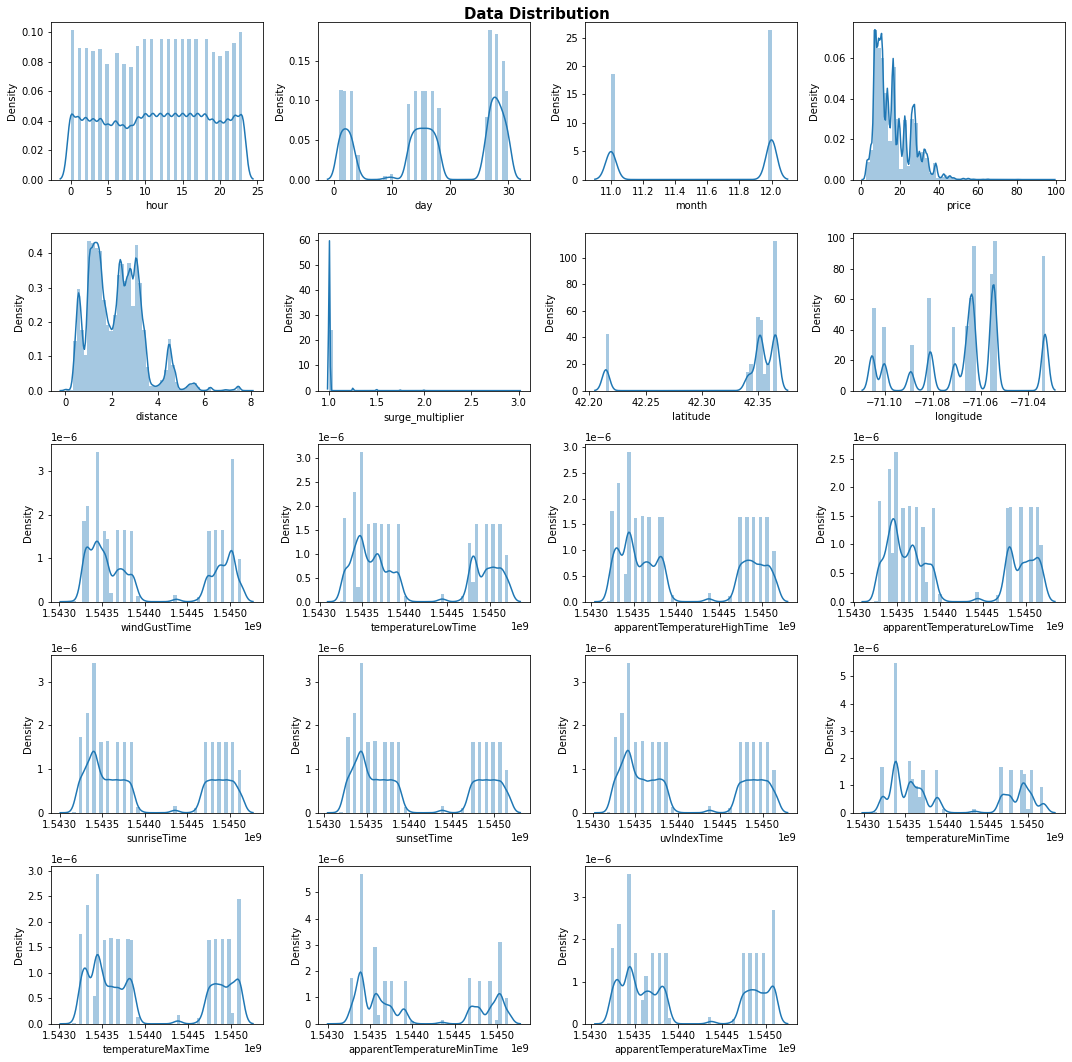

In [38]:
plt.figure(figsize=(15,15))
plt.suptitle('Data Distribution', fontsize=15, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.distplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

- All numerical features does not follow normal distribution.

In [39]:
#checking outliers

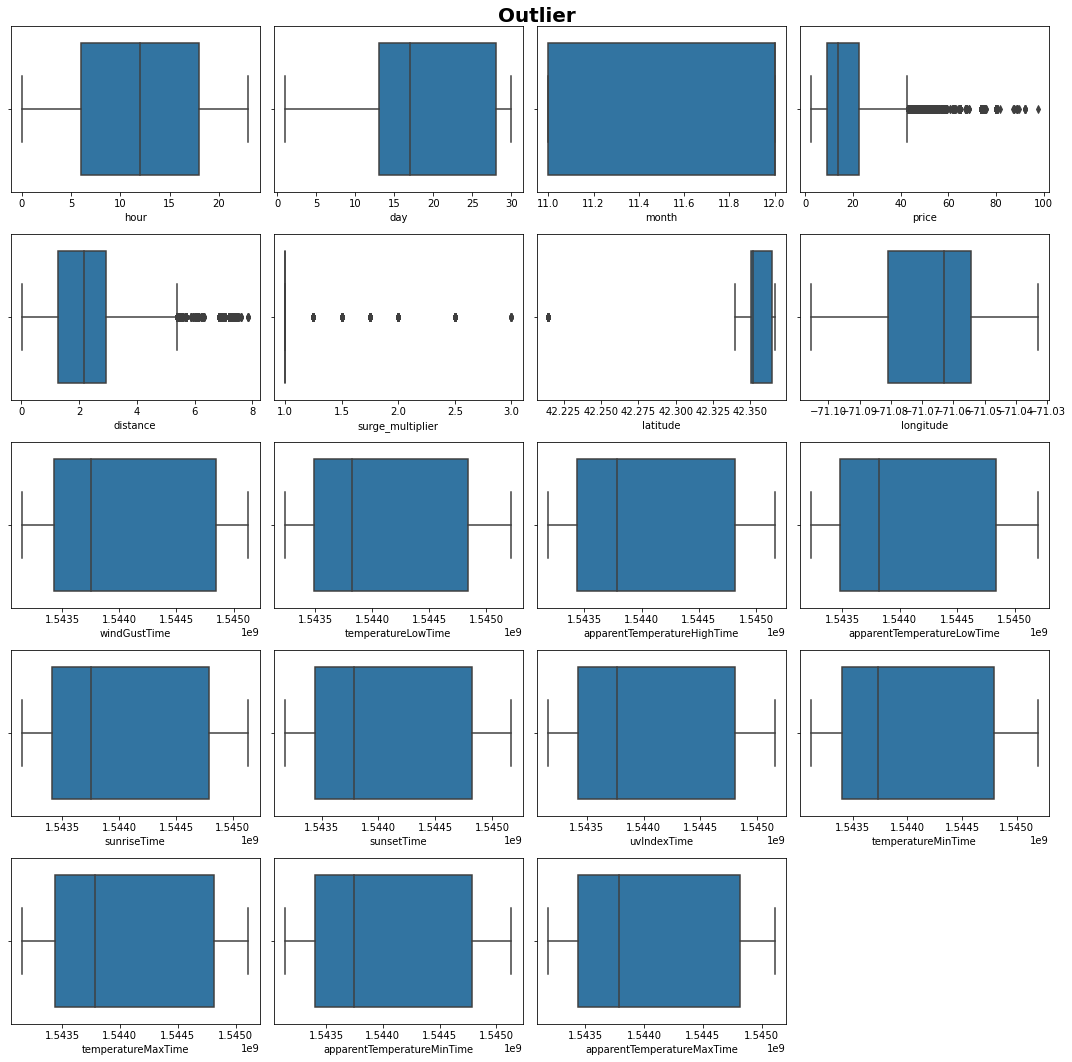

In [40]:
plt.figure(figsize=(15,15))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

- `price`,`distance`,`surge_multiplier`,`latitude` have outliers

In [41]:
cat_col

['time',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

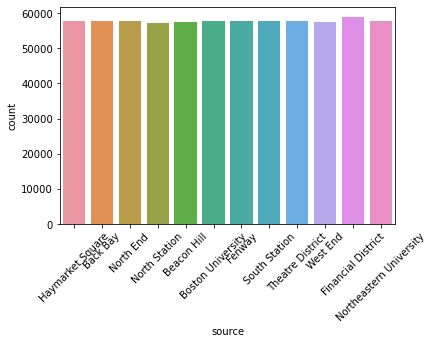

In [42]:
sns.countplot(x=df['source'],data=df)
plt.xticks(rotation=45)
plt.show()

In [43]:
df['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

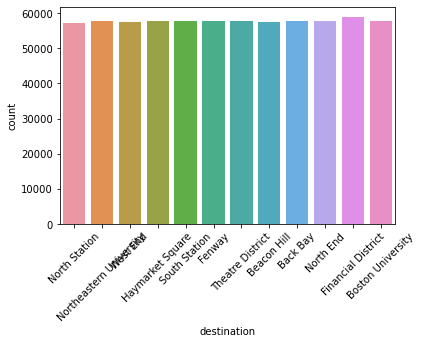

In [44]:
sns.countplot(x=df['destination'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

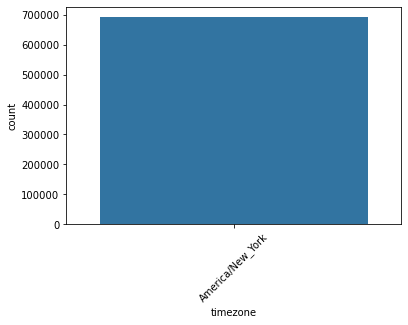

In [45]:
sns.countplot(x=df['timezone'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

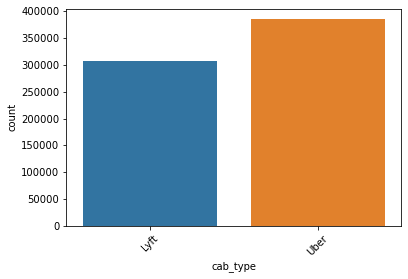

In [46]:
sns.countplot(x=df['cab_type'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

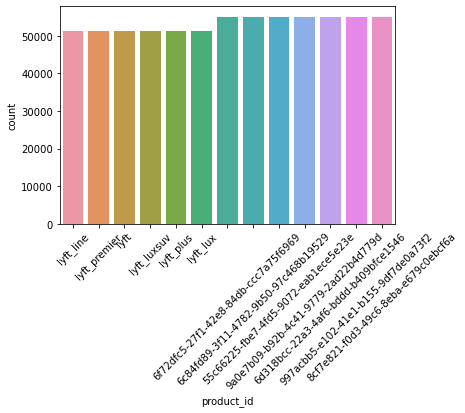

In [47]:
sns.countplot(x=df['product_id'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

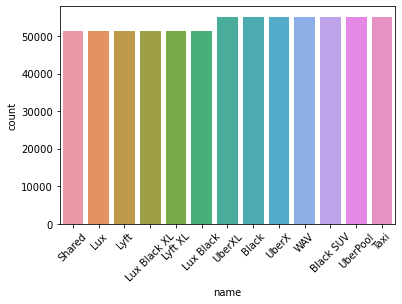

In [48]:
sns.countplot(x=df['name'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

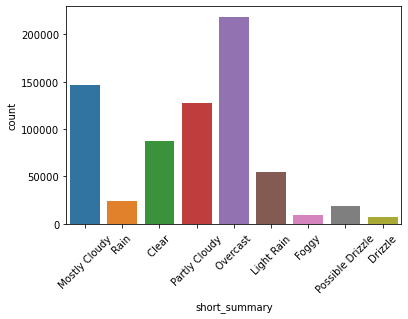

In [49]:
sns.countplot(x=df['short_summary'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

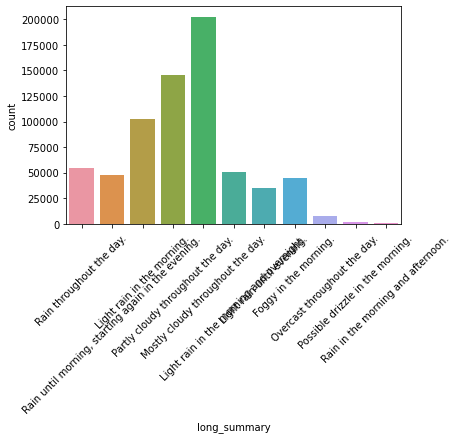

In [50]:
sns.countplot(x=df['long_summary'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

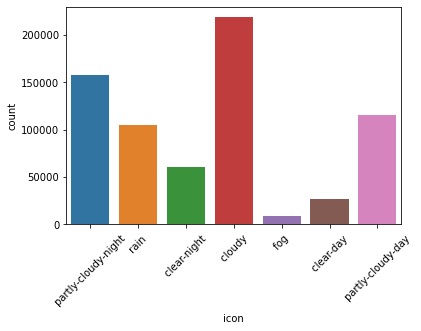

In [51]:
sns.countplot(x=df['icon'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

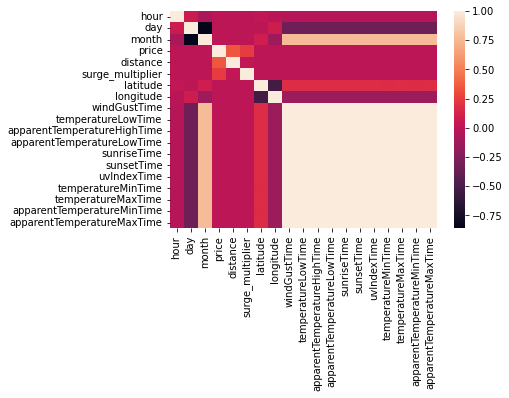

In [52]:
sns.heatmap(df.corr())

In [53]:
# Re indexing
df = df.reset_index(drop=True)

In [54]:
#Outlier handling

In [55]:
def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [56]:
for columns in num_df:
    handling_outliers(df,columns)

hour --- IQR ---> 12.0
Lower Fence: -12.0
Higher Fence: 36.0
______________________________________________
day --- IQR ---> 15.0
Lower Fence: -9.5
Higher Fence: 50.5
______________________________________________
month --- IQR ---> 1.0
Lower Fence: 9.5
Higher Fence: 13.5
______________________________________________
price --- IQR ---> 13.5
Lower Fence: -11.25
Higher Fence: 42.75
______________________________________________
distance --- IQR ---> 1.64
Lower Fence: -1.18
Higher Fence: 5.38
______________________________________________
surge_multiplier --- IQR ---> 0.0
Lower Fence: 1.0
Higher Fence: 1.0
______________________________________________
latitude --- IQR ---> 0.014400000000001967
Lower Fence: 42.3287
Higher Fence: 42.386300000000006
______________________________________________
longitude --- IQR ---> 0.026800000000008595
Lower Fence: -71.12120000000002
Higher Fence: -71.01399999999998
______________________________________________
windGustTime --- IQR ---> 1414800.0
Lower

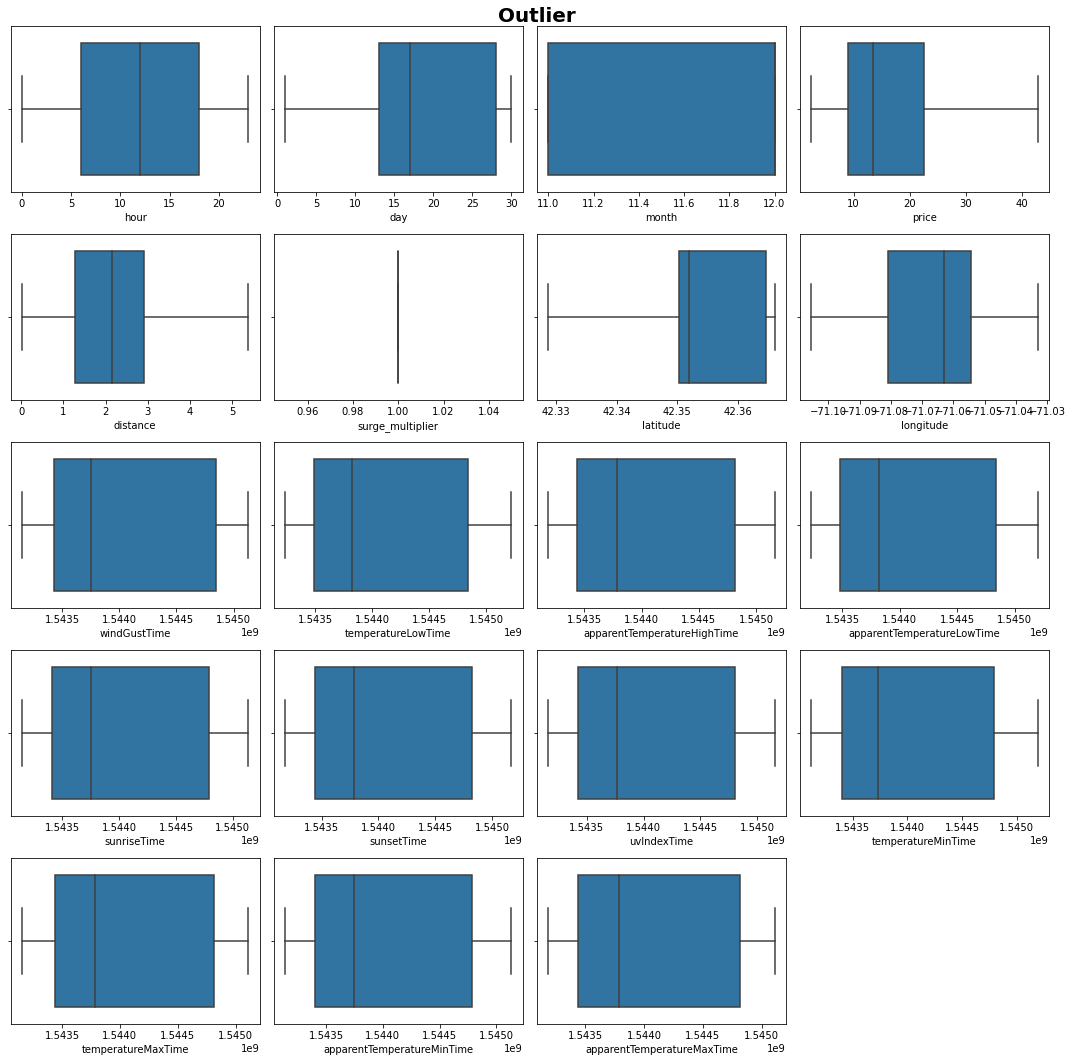

In [57]:
plt.figure(figsize=(15,15))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [58]:
#Filling Missing values
df['price']=df['price'].fillna(0)

### Price Prediction

In [59]:
# Split the data into training and testing sets
X = df.drop(['price'], axis=1)
y = df['price']

In [60]:
num_col

['hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'windGustTime',
 'temperatureLowTime',
 'apparentTemperatureHighTime',
 'apparentTemperatureLowTime',
 'sunriseTime',
 'sunsetTime',
 'uvIndexTime',
 'temperatureMinTime',
 'temperatureMaxTime',
 'apparentTemperatureMinTime',
 'apparentTemperatureMaxTime']

In [61]:
cat_col

['time',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [62]:
# Creating new variables for numerical attributes/columns
numeric_features = ['hour','day','month','distance','surge_multiplier','latitude','longitude','windGustTime','temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['timezone','source','destination','cab_type','product_id','name','short_summary','long_summary','icon']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(transformers=[
                                                ('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features),
                                            ])

In [63]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#Gradient Boosting

In [65]:
#Model Training
gb = Pipeline(steps=[('prepocessor', preprocessor), ('Gradient Boosting Regressor', GradientBoostingRegressor())])
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)

#Model evaluation
mse = mean_squared_error(y_test, y_pred)
test_acc_gb = r2_score(y_test, y_pred)
print("MSE:", mse)
print("Accuracy:", test_acc_gb)

MSE: 4.92282570813521
Accuracy: 0.9484150576380231


In [66]:
# Ada Boost

In [67]:
#Model Training
adb = Pipeline(steps=[('prepocessor', preprocessor), ('Ada Boost Regressor', AdaBoostRegressor())])
adb.fit(X_train,y_train)

y_pred = adb.predict(X_test)

#Model evaluation
mse = mean_squared_error(y_test, y_pred)
test_acc_adb = r2_score(y_test, y_pred)
print("MSE:", mse)
print("Accuracy:", test_acc_adb)

MSE: 45.240383771112334
Accuracy: 0.5259384086237401


In [68]:
#XGBoost

In [69]:
#Model Training
xgb = Pipeline(steps=[('prepocessor', preprocessor), ('XGBoost Regressor', XGBRegressor())])
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

#Model evaluation
mse = mean_squared_error(y_test, y_pred)
test_acc_xgb = r2_score(y_test, y_pred)
print("MSE:", mse)
print("Accuracy:", test_acc_xgb)


MSE: 4.010735469301908
Accuracy: 0.9579726014530286


In [70]:
# Random Forest

In [71]:
models = pd.DataFrame({
    'Model' : ['Gradient Boosting','AdaBoost','XGBoost'],
    'R2 Score' : [test_acc_gb,test_acc_adb,test_acc_xgb],
})

best_model =models.sort_values(by='R2 Score', ascending=False)
best_model

,Model,R2 Score
2,XGBoost,0.957973
0,Gradient Boosting,0.948415
1,AdaBoost,0.525938


- Xgb regressor performs better.

In [72]:
y_pred[0:5]

array([ 9.289845  , 15.179356  ,  0.18022208,  0.07746796, 13.85306   ],
      dtype=float32)

### High booking area prediction

In [73]:
df.head()

,hour,day,month,time,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,windGustTime,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,icon,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,9,16.0,12.0,09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.3287,-71.033,Mostly Cloudy,Rain throughout the day.,1545015600,1545048000,1544968800,1545044400,partly-cloudy-night,1.544962e+09,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000
1,2,27.0,11.0,02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.3287,-71.033,Rain,"Rain until morning, starting again in the eve...",1543291200,1543298400,1543251600,1543291200,rain,1.543233e+09,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600
2,1,28.0,11.0,01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.3287,-71.033,Clear,Light rain in the morning.,1543334400,1543402800,1543320000,1543392000,clear-night,1.543319e+09,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000
3,4,30.0,11.0,04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.3287,-71.033,Clear,Partly cloudy throughout the day.,1543514400,1543579200,1543510800,1543575600,clear-night,1.543492e+09,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800
4,3,29.0,11.0,03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.3287,-71.033,Partly Cloudy,Mostly cloudy throughout the day.,1543446000,1543478400,1543420800,1543460400,partly-cloudy-night,1.543406e+09,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800


In [74]:
from sklearn.cluster import KMeans

In [75]:
# Select relevant features for clustering
features = [ 'source', 'destination','latitude', 'longitude']

In [76]:
df_new = df[features]

In [77]:
df_new.head(2)

,source,destination,latitude,longitude
0,Haymarket Square,North Station,42.3287,-71.033
1,Haymarket Square,North Station,42.3287,-71.033


In [78]:
#encoding categorical variable
ohe = OneHotEncoder(sparse=False)

In [79]:
# Fit and transform the data
one_hot_encoded = ohe.fit_transform(df_new[['source', 'destination']])

In [80]:
# Create a new DataFrame with the one-hot encoded columns
columns = ohe.get_feature_names(['source', 'destination'])
df_enc = pd.DataFrame(one_hot_encoded, columns=columns)

In [83]:
# Concatenate the original DataFrame with the one-hot encoded columns
df_encoded= pd.concat([df_enc, df_new[['latitude', 'longitude']]], axis=1)

In [84]:
df_enc.head(2)

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
# Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(df_encoded)

KMeans(n_clusters=3, random_state=10)

In [86]:
# Get the cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, ..., 2, 2, 2])

In [87]:
kmeans.cluster_centers_

array([[ 6.04100103e-14, -2.73947531e-14,  2.00159951e-01,
         2.00255756e-01, -5.53862511e-14, -2.18991492e-14,
         2.01705315e-01,  2.83245649e-14,  2.00447364e-01,
         1.97431615e-01,  2.10387263e-14,  7.29416527e-14,
         2.00668130e-01,  1.99260225e-01, -7.39269757e-14,
        -6.13814555e-14, -4.02317069e-14, -7.39269757e-14,
         8.92480534e-14,  1.97794004e-01, -5.37209166e-14,
        -8.44047054e-14,  2.00593153e-01,  2.01684488e-01,
         4.23526958e+01, -7.10661247e+01],
       [ 3.68038933e-14,  3.01425551e-14,  9.12233568e-02,
         9.09415423e-02, -3.25156568e-14,  5.42361418e-01,
         8.77288569e-02, -2.72698530e-14,  9.05000329e-02,
         9.72447935e-02,  1.93178806e-14,  4.51028104e-14,
         9.02276122e-02,  8.98612533e-02,  1.93040028e-14,
         1.92207361e-14,  5.52835524e-01,  1.93040028e-14,
        -2.04003481e-14,  9.05000329e-02,  3.43058915e-14,
        -5.53029844e-14,  9.05657896e-02,  8.60097884e-02,
         4.23

In [88]:
# Add cluster labels to the DataFrame
df_enc['cluster'] = cluster_labels

In [89]:
df_enc.head(2)

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cluster
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [90]:
# Get the high booking area based on the most common cluster
high_booking_area = df_enc['cluster'].value_counts().idxmax()

print(f"The high booking area is cluster {high_booking_area}")


The high booking area is cluster 2


In [91]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_enc['cluster'],kmeans.labels_))

[[240073      0      0]
 [     0 106453      0]
 [     0      0 346545]]


In [92]:
print(classification_report(df_enc['cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240073
           1       1.00      1.00      1.00    106453
           2       1.00      1.00      1.00    346545

    accuracy                           1.00    693071
   macro avg       1.00      1.00      1.00    693071
weighted avg       1.00      1.00      1.00    693071

